# Algorithms - Chapter 11 - Balanced Search Trees Balance Tests

## 5/3/2023

### Joy Upton-Azzam

<mark>___________________________________________________________________________________________________________________________</mark>

#### 1. Binary Search Tree

In [1]:
%run "Alg_Ch11_(BalancedTreeMap-classes).ipynb"

<mark>___________________________________________________________________________________________________________________________</mark>

# Balance Tests

The code below is a modification of homework problem 8.29. The modifications is to count the number of nodes in the subtree rooted at p (this includes the root node p).

In [2]:
#R-8.29
def subtree_size(p):
    """returns the number of nodes in the subtree rooted at position p"""
    if not p: return 0      # check for p == None
    
    T = p.container
    count = 0               # Number of descendents
    S = [p]                 # Stack used for traversal
    
    while len(S) > 0:       # Depth-First Traversal (using a stack)
        p = S.pop()
        count+=1        
        if T.left(p): S.append(T.left(p))      # Continue Traversal
        if T.right(p): S.append(T.right(p))    # Continue Traversal
    
    return count

In [3]:
def get_balance(T):
    """Return Some Balance Information about the tree T"""
    root = T.root()
    print("Tree_size(layer 0):",subtree_size(root))

    left = T.left(root)
    right = T.right(root)
    print("\nTree_size(layer 1):",subtree_size(left))
    print("Tree_size(layer 1):",subtree_size(right))

    print("\nTree_size(layer 2):",subtree_size(T.left(left)))
    print("Tree_size(layer 2):",subtree_size(T.right(left)))
    print("Tree_size(layer 2):",subtree_size(T.left(right)))
    print("Tree_size(layer 2):",subtree_size(T.right(right)))
    
    print("\n")

TreeMap: 0.00183460000000224
Tree_size(layer 0): 100

Tree_size(layer 1): 11
Tree_size(layer 1): 88

Tree_size(layer 2): 3
Tree_size(layer 2): 7
Tree_size(layer 2): 12
Tree_size(layer 2): 75


AVLTree: 0.0037511000000023387
Tree_size(layer 0): 100

Tree_size(layer 1): 49
Tree_size(layer 1): 50

Tree_size(layer 2): 24
Tree_size(layer 2): 24
Tree_size(layer 2): 28
Tree_size(layer 2): 21


SplayTree: 0.00702890000000167
Tree_size(layer 0): 100

Tree_size(layer 1): 26
Tree_size(layer 1): 73

Tree_size(layer 2): 6
Tree_size(layer 2): 19
Tree_size(layer 2): 3
Tree_size(layer 2): 69


RedBlackTree: 0.0026656000000002678
Tree_size(layer 0): 100

Tree_size(layer 1): 49
Tree_size(layer 1): 50

Tree_size(layer 2): 24
Tree_size(layer 2): 24
Tree_size(layer 2): 18
Tree_size(layer 2): 31


Search Tree


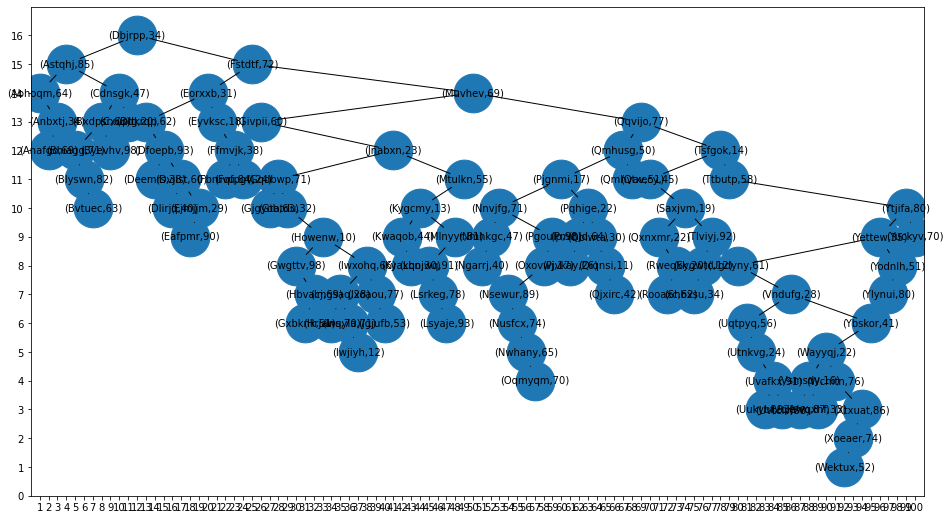


AVL-Tree


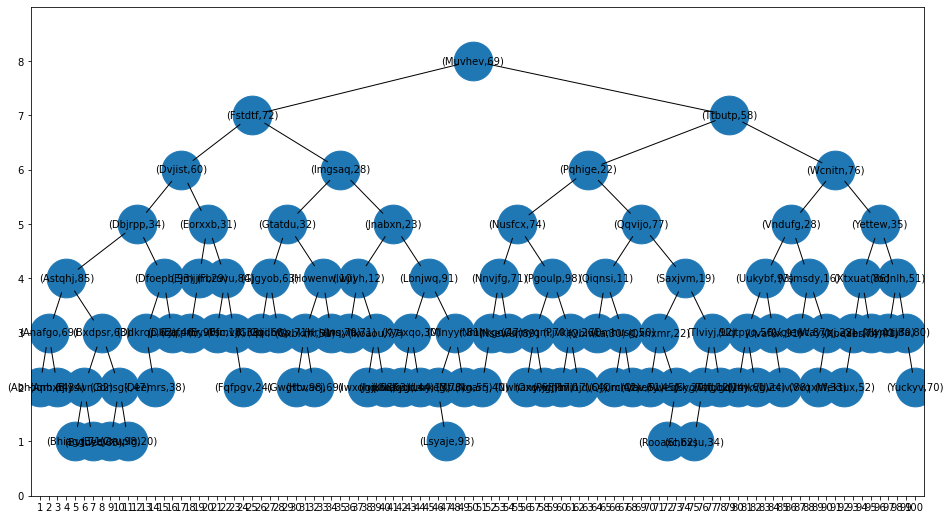


Splay-Tree


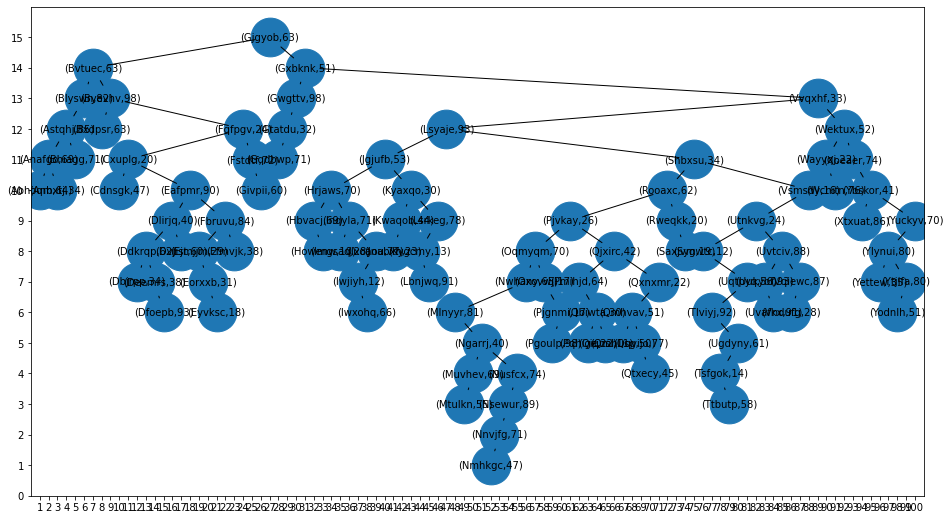


Red-Black Tree


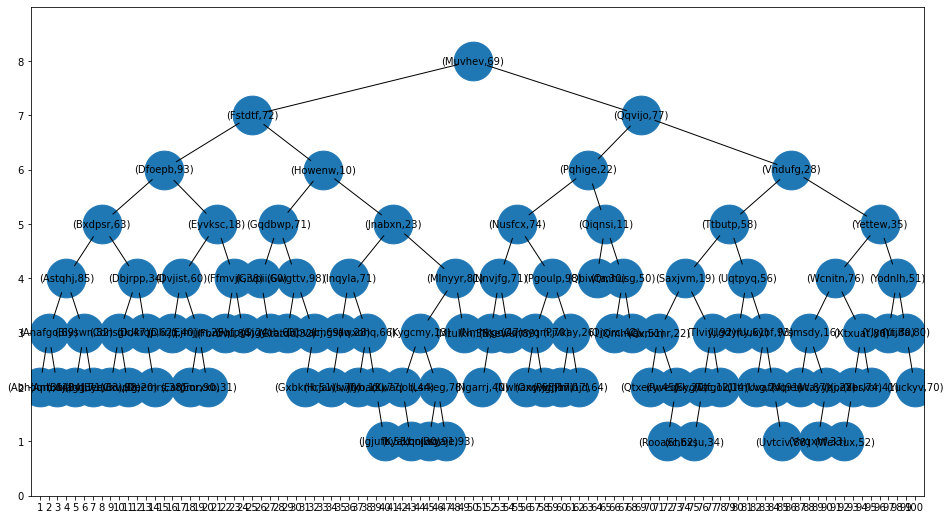

In [4]:
from random import randrange as rand
from random import choice
from time import perf_counter


def randUl():
    """random upper case letter"""
    return chr(rand(ord('A'),ord('Z')))
def randl():
    """random lower case letter"""
    return chr(rand(ord('a'),ord('z')))
def rand_key(n=6):
    """random key of length n (with default length = 6)"""
    return ''.join([randUl()]+[randl() for i in range(n-1)])


TM0 = TreeMap()                                      # Create one of each TreeMap
TM1 = AVLTreeMap()
TM2 = SplayTreeMap()
TM3 = RedBlackTreeMap()


n = 100                                              # size of data
KEYS = [rand_key() for i in range(n)]                # Create a list of Keys
VALUES = [rand(10,100) for i in range(n)]            # Create a list of Values


#--------------------------Testing the TreeMap------------------------------------
start = perf_counter()                               # start the timer
for i in range(n):
    key = KEYS[i]
    value = VALUES[i]
    
    TM0[key] = value                                 # add key-value pair to Map

stop = perf_counter()                                # stop timer
TM_time = stop - start                               # compute difference in time
print("TreeMap:",TM_time)                            # print timing output for TreeMap
#-----------------Computing Balance Numbers----------------
get_balance(TM0)


#--------------------------Testing the AVL-Tree------------------------------------
start = perf_counter()
for i in range(n):
    key = KEYS[i]
    value = VALUES[i]
    
    TM1[key] = value

stop = perf_counter()
AVL_time = stop - start
print("AVLTree:",AVL_time)
#-----------------Computing Balance Numbers----------------
get_balance(TM1)


#--------------------------Testing the Splay-Tree------------------------------------
start = perf_counter()
for i in range(n):
    key = KEYS[i]
    value = VALUES[i]
    
    TM2[key] = value

stop = perf_counter()
Splay_time = stop - start
print("SplayTree:",Splay_time)
#-----------------Computing Balance Numbers----------------
get_balance(TM2)


#--------------------------Testing the Red-Black-Tree------------------------------------
start = perf_counter()
for i in range(n):
    key = KEYS[i]
    value = VALUES[i]
    
    TM3[key] = value

stop = perf_counter()
RB_time = stop - start
print("RedBlackTree:",RB_time)
#-----------------Computing Balance Numbers----------------
get_balance(TM3)



#-------------------------Printing the trees---------------------------------------------
print("Search Tree")
printTree(TM0,1,1500,10)
print("\nAVL-Tree")
printTree(TM1,1,1500,10)
print("\nSplay-Tree")
printTree(TM2,1,1500,10)
print("\nRed-Black Tree")
printTree(TM3,1,1500,10)